# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
# Make data frame

cities_dict = {"city": cities, "country": countries}

weather_df = pd.DataFrame(cities_dict)

# Add columns
weather_df["id"] = ""
weather_df["latitude"] = ""
weather_df["longitude"] = ""
weather_df["temp_f"] = ""
weather_df["humidity"] = ""
weather_df["cloudiness"] = ""
weather_df["wind_speed"] = ""
weather_df["date"] = ""

weather_df.head()

,city,country,id,latitude,longitude,temp_f,humidity,cloudiness,wind_speed,date
0,nanortalik,gl,,,,,,,,
1,geraldton,au,,,,,,,,
2,ushuaia,ar,,,,,,,,
3,kapaa,us,,,,,,,,
4,shache,cn,,,,,,,,


In [49]:
# Parameters
units = "imperial"
parameters = {"appid": api_key, "units": units}

# Data Search
for index, row in weather_df.iterrows():
    url = "https://api.openweathermap.org/data/2.5/weather"
    

    city = row["city"]
    country = row["country"]
    
    parameters["q"] = f"{city},{country}"

    
    
    print(f"Retrieving results for {city}, {country} (country code).")
    weather_response = requests.get(url, parameters)
   
    weather_response = weather_response.json()
    

# Pull Data
try:
        
        
        weather_df.loc[index, "id"] = weather_response['id']
        weather_df.loc[index, "latitude"] = weather_response['coord']['lat']
        weather_df.loc[index, "longitude"] = weather_response['coord']['lon']
        weather_df.loc[index, "temp_f"] = weather_response['main']['temp']
        weather_df.loc[index, "humidity"] = weather_response['main']['humidity']
        weather_df.loc[index, "cloudiness"] = weather_response['clouds']['all']
        weather_df.loc[index, "wind_speed"] = weather_response['wind']['speed']
        weather_df.loc[index, "date"] = weather_response['dt']
        
except (KeyError, IndexError):
       print("Missing field/result... skipping.")
    
print("---------")
#     break

Retrieving results for nanortalik, gl (country code).
Retrieving results for geraldton, au (country code).
Retrieving results for ushuaia, ar (country code).
Retrieving results for kapaa, us (country code).
Retrieving results for shache, cn (country code).
Retrieving results for saltillo, mx (country code).
Retrieving results for punta arenas, cl (country code).
Retrieving results for port elizabeth, za (country code).
Retrieving results for barrow, us (country code).
Retrieving results for gazojak, tm (country code).
Retrieving results for tiksi, ru (country code).
Retrieving results for rikitea, pf (country code).
Retrieving results for khatanga, ru (country code).
Retrieving results for cabo san lucas, mx (country code).
Retrieving results for hermanus, za (country code).
Retrieving results for nogliki, ru (country code).
Retrieving results for belmonte, br (country code).
Retrieving results for beyneu, kz (country code).
Retrieving results for mataura, pf (country code).
Retrieving

Retrieving results for kismayo, so (country code).
Retrieving results for ahipara, nz (country code).
Retrieving results for oxford, us (country code).
Retrieving results for avera, pf (country code).
Retrieving results for east london, za (country code).
Retrieving results for vila, vu (country code).
Retrieving results for aksarka, ru (country code).
Retrieving results for severo-kurilsk, ru (country code).
Retrieving results for nuuk, gl (country code).
Retrieving results for grand river south east, mu (country code).
Retrieving results for nantucket, us (country code).
Retrieving results for the valley, ai (country code).
Retrieving results for fortuna, us (country code).
Retrieving results for puerto ayora, ec (country code).
Retrieving results for sorland, no (country code).
Retrieving results for sitka, us (country code).
Retrieving results for bethel, us (country code).
Retrieving results for los llanos de aridane, es (country code).
Retrieving results for qandala, so (country 

Retrieving results for necochea, ar (country code).
Retrieving results for burica, pa (country code).
Retrieving results for carikar, af (country code).
Retrieving results for bambous virieux, mu (country code).
Retrieving results for tukrah, ly (country code).
Retrieving results for teguise, es (country code).
Retrieving results for kununurra, au (country code).
Retrieving results for calama, cl (country code).
Retrieving results for esperance, au (country code).
Retrieving results for gangapur, in (country code).
Retrieving results for kaeo, nz (country code).
Retrieving results for kenora, ca (country code).
Retrieving results for quesnel, ca (country code).
Retrieving results for mwene-ditu, cd (country code).
Retrieving results for kudahuvadhoo, mv (country code).
Retrieving results for hare bay, ca (country code).
Retrieving results for nanga eboko, cm (country code).
Retrieving results for hithadhoo, mv (country code).
Retrieving results for suksun, ru (country code).
Retrieving

Retrieving results for inta, ru (country code).
Retrieving results for kahului, us (country code).
Retrieving results for lakshmeshwar, in (country code).
Retrieving results for bara, sd (country code).
Retrieving results for saint-georges, gf (country code).
Retrieving results for wajid, so (country code).
Retrieving results for liuli, tz (country code).
Retrieving results for bellavista, pe (country code).
Retrieving results for biltine, td (country code).
Retrieving results for yarim, ye (country code).
Retrieving results for dudinka, ru (country code).
Retrieving results for iqaluit, ca (country code).
Retrieving results for ukiah, us (country code).
Retrieving results for sabang, id (country code).
Retrieving results for merauke, id (country code).
Retrieving results for nome, us (country code).
Retrieving results for mahibadhoo, mv (country code).
Retrieving results for khani, ru (country code).
Retrieving results for shinjo, jp (country code).
Retrieving results for leshukonskoy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
weather_df.head()
              
       

,city,country,id,latitude,longitude,temp_f,humidity,cloudiness,wind_speed,date
622,lydenburg,za,981158.0,-25.1,30.46,72.0,89.0,80.0,1.92,1.553572e+09


In [53]:
weather_clean = weather_df
weather_clean.replace('', np.nan, inplace=True)
weather_clean.dropna(subset=["latitude", "longitude", "temp_f", "humidity", "cloudiness", "wind_speed"], inplace=True)

print(weather_clean.count())

weather_clean.to_csv("cities_weather.csv", index=False, header=True)


city          1
country       1
id            1
latitude      1
longitude     1
temp_f        1
humidity      1
cloudiness    1
wind_speed    1
date          1
dtype: int64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

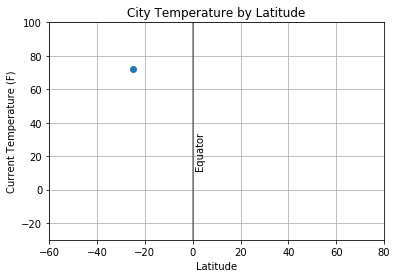

In [62]:
# x and y
x_axis = weather_clean["latitude"]
y_temp = weather_clean["temp_f"]
plt.scatter(x_axis, y_temp, marker="o") 

# chart
plt.title("City Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Current Temperature (F)")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([-30, 100])

# figure
plt.savefig("temp_lat.png")

#  plot
plt.show()

#### Latitude vs. Humidity Plot

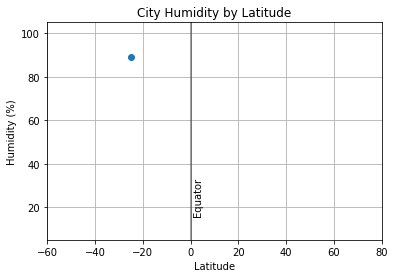

In [61]:
y_hum = weather_clean["humidity"]
plt.scatter(x_axis, y_hum, marker="o") 

plt.title("City Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([5, 105])

plt.savefig("humidity_lat.png")


plt.show()

#### Latitude vs. Cloudiness Plot

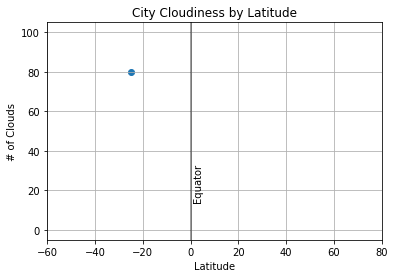

In [60]:
y_clouds = weather_clean["cloudiness"]
plt.scatter(x_axis, y_clouds, marker="o") 
plt.title("City Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("# of Clouds")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([-5, 105])

plt.savefig("clouds_lat.png")

plt.show()

#### Latitude vs. Wind Speed Plot

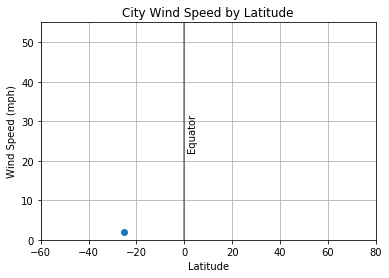

In [63]:
y_wind = weather_clean["wind_speed"]
plt.scatter(x_axis, y_wind, marker="o") 
plt.title("City Wind Speed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([0, 55])

plt.savefig("wind_lat.png")

plt.show()